Customer Segmentation Using K-Means Clustering

Paper link- https://www.researchgate.net/publication/355587534_Customer_Segmentation_Using_K-_Means_Clustering_Algorithm

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/Mall_Customers[1].csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.rename(columns={"Genre":"Gender"}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

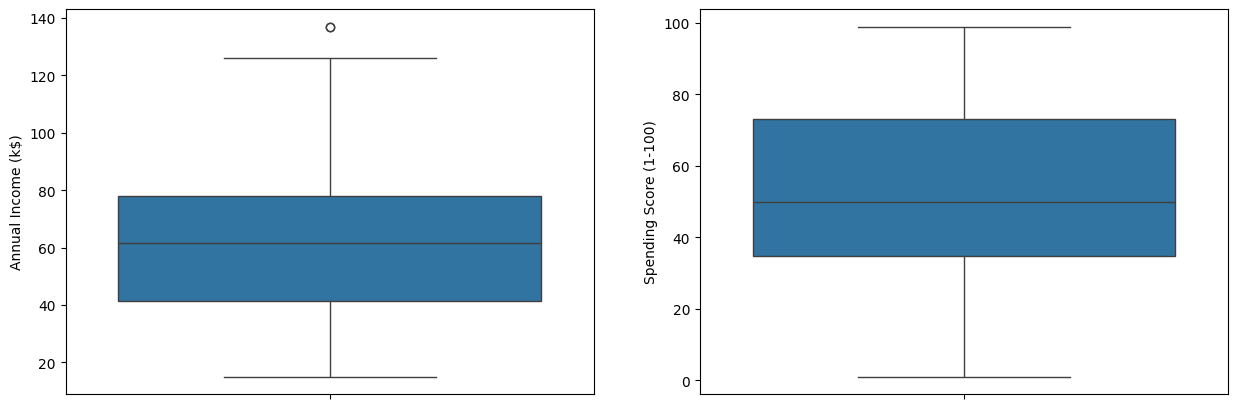

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")

plt.show()

<ipython-input-9-177f7a0967ab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


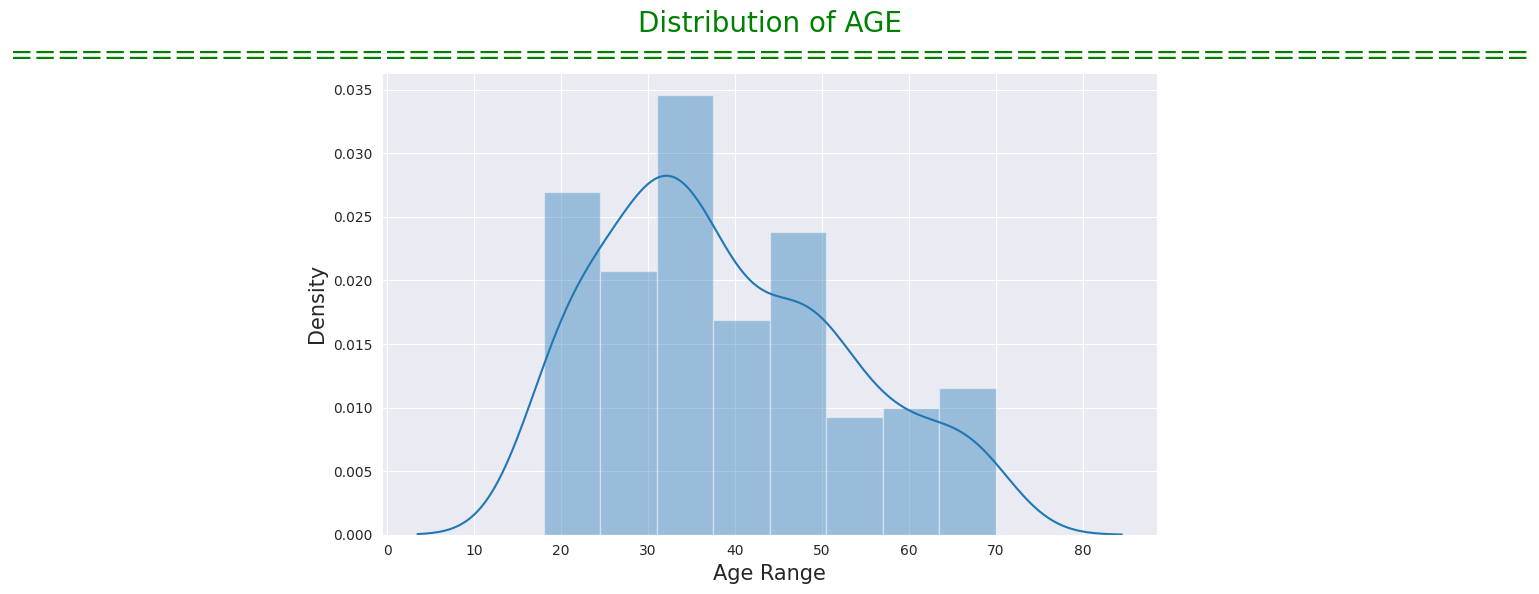

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df.Age)
plt.title("Distribution of AGE\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()

<ipython-input-10-f3f267dc5a3c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual Income (k$)"])


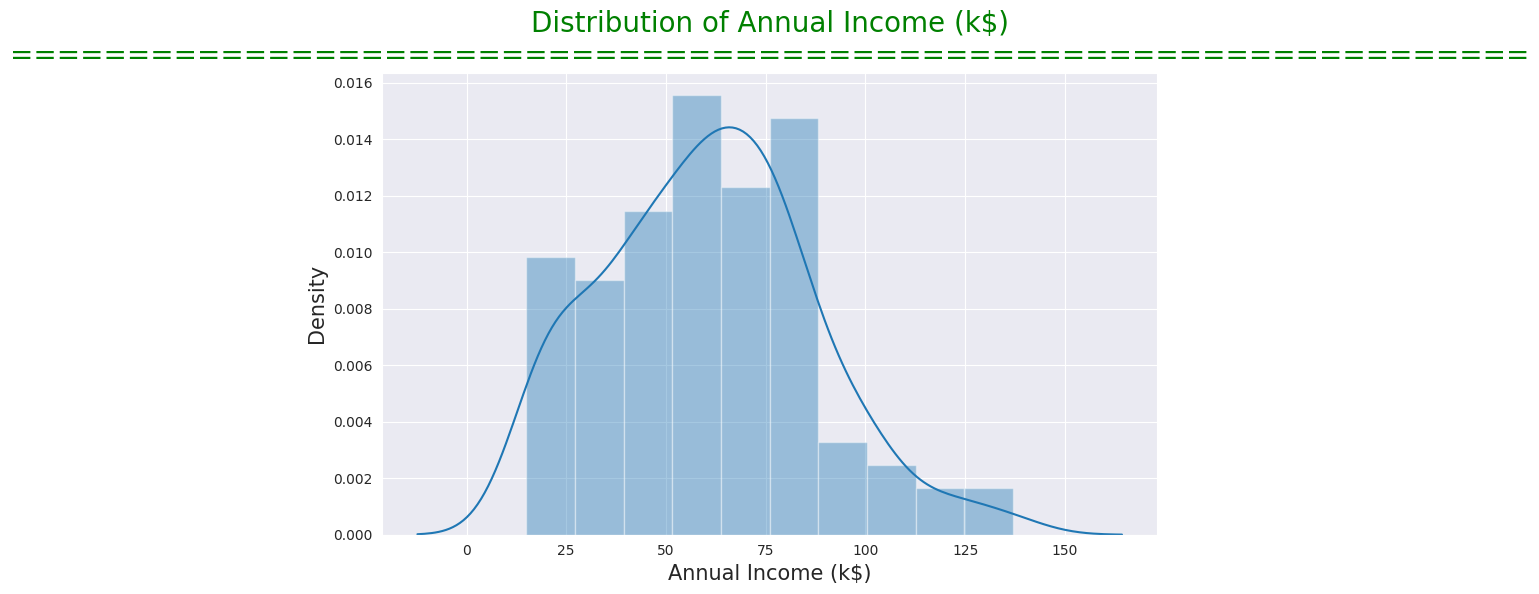

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["Annual Income (k$)"])
plt.title("Distribution of Annual Income (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Annual Income (k$)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

<ipython-input-11-21543154b6b6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Spending Score (1-100)"])


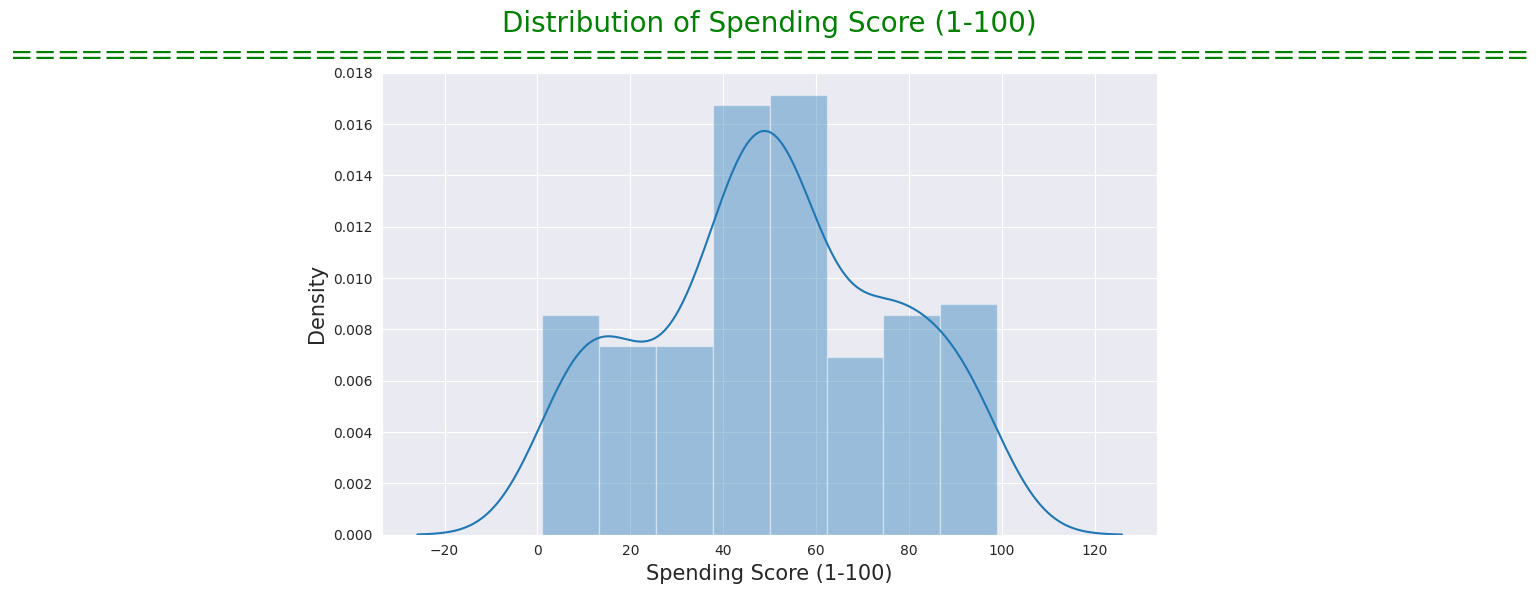

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

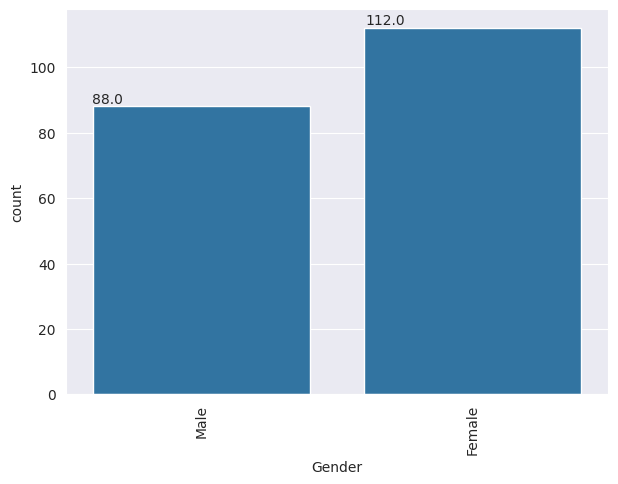

In [ ]:
plt.figure(figsize = (7,5))
gender = df['Gender'].sort_values(ascending = False)
ax = sns.countplot(x='Gender', data= df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=90)
plt.show()

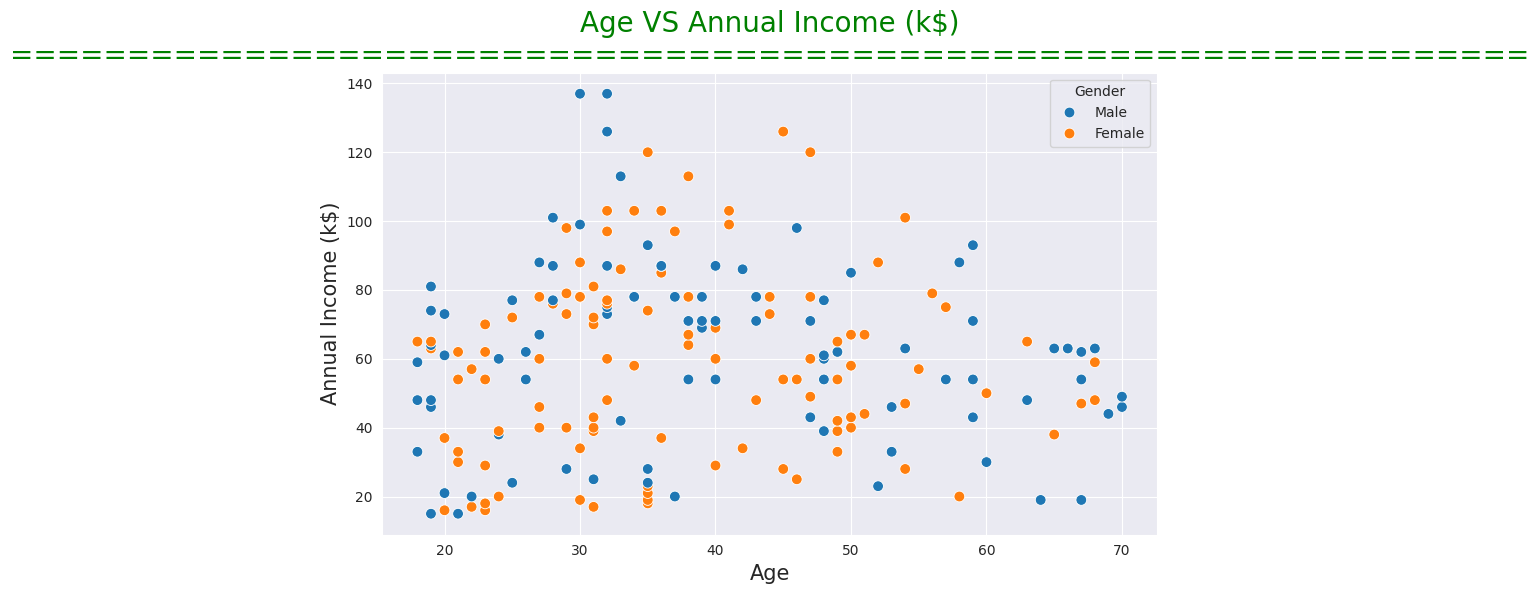

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Age", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Age VS Annual Income (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

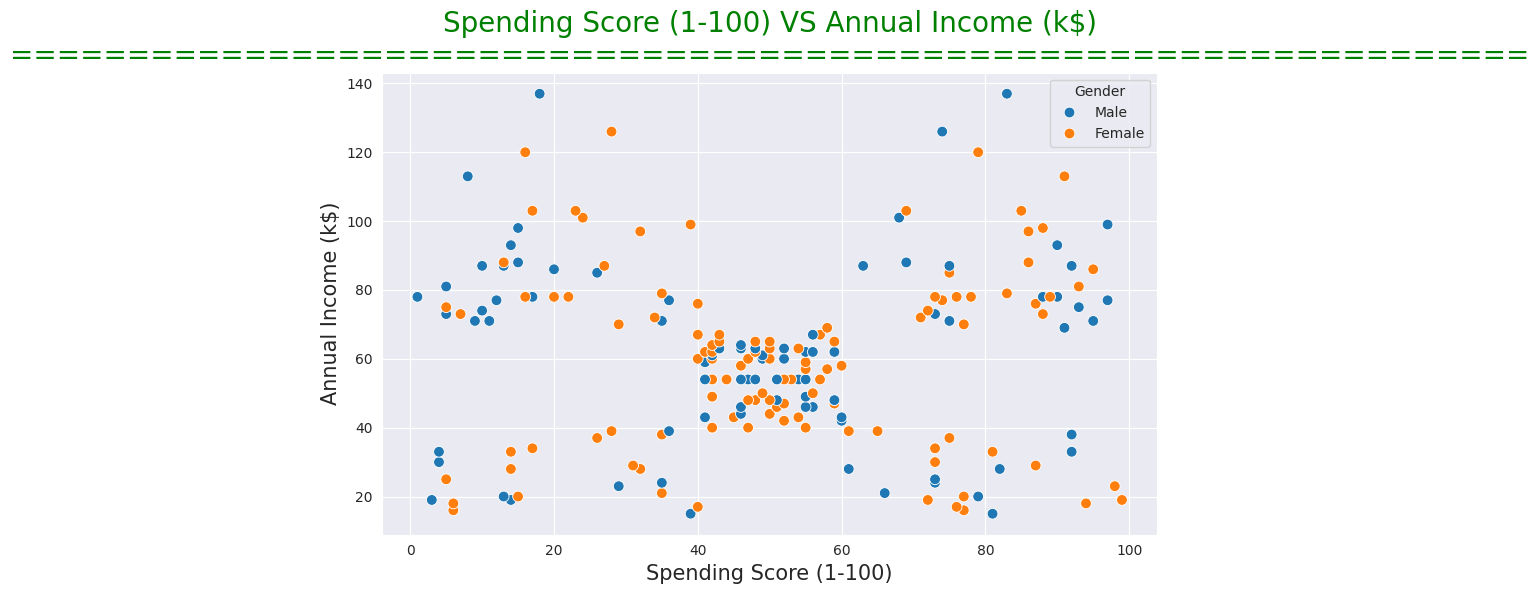

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Spending Score (1-100) VS Annual Income (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

In [ ]:
Age_18_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
Age_26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
Age_36_45 = df.Age[(df.Age>=36) & (df.Age<=45)]
Age_46_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
Age_55_Above = df.Age[(df.Age>=56)]

<ipython-input-16-1edf9ed38fd9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="nipy_spectral_r")


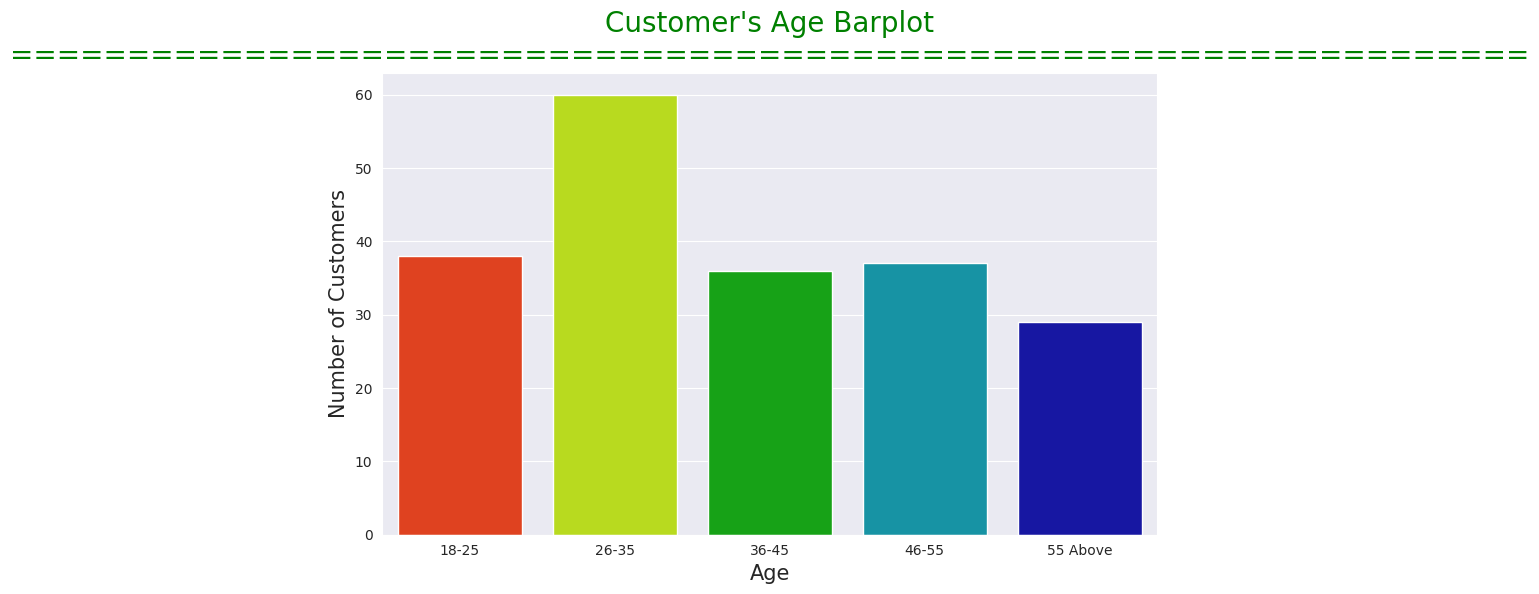

In [ ]:
x = ["18-25","26-35","36-45","46-55","55 Above"]
y = [len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_55_Above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Customer's Age Barplot\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

<ipython-input-17-8a8243814efe>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_x, y=score_y,palette="nipy_spectral_r")


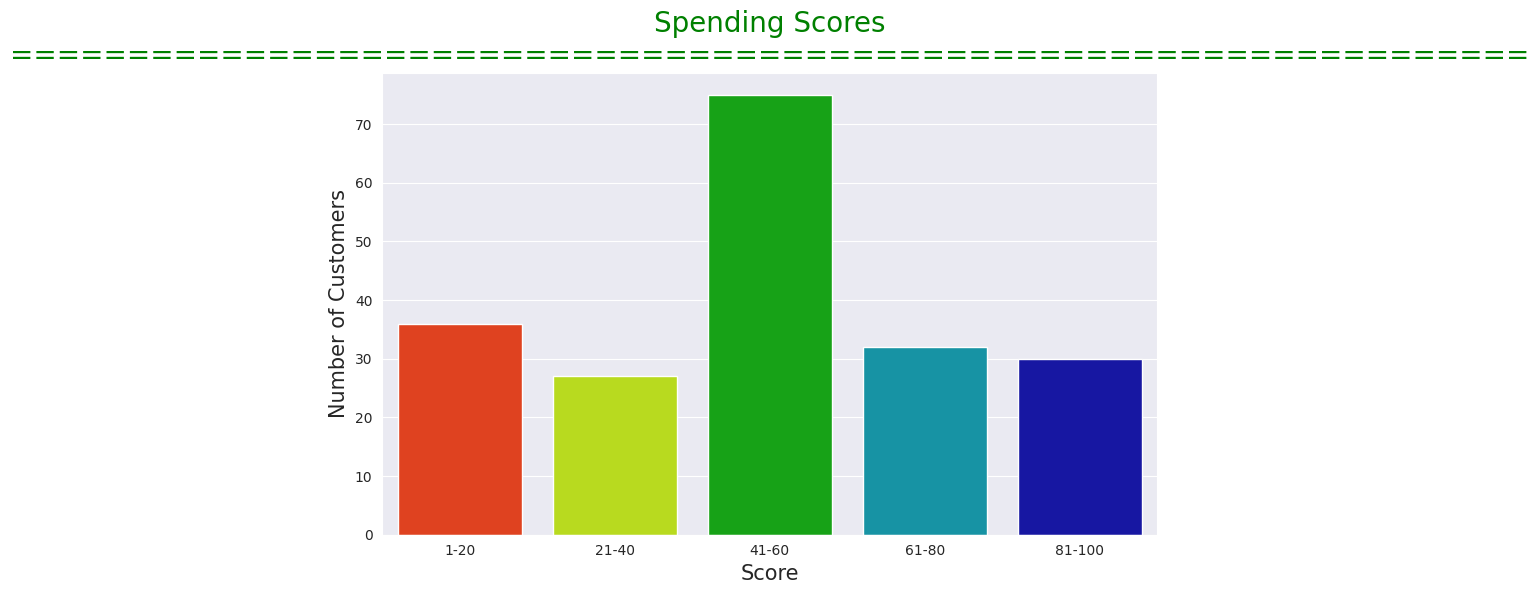

In [ ]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="nipy_spectral_r")
plt.title("Spending Scores\n=================================================================", fontsize=20, color="green")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

<ipython-input-18-3e576db9e85d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")


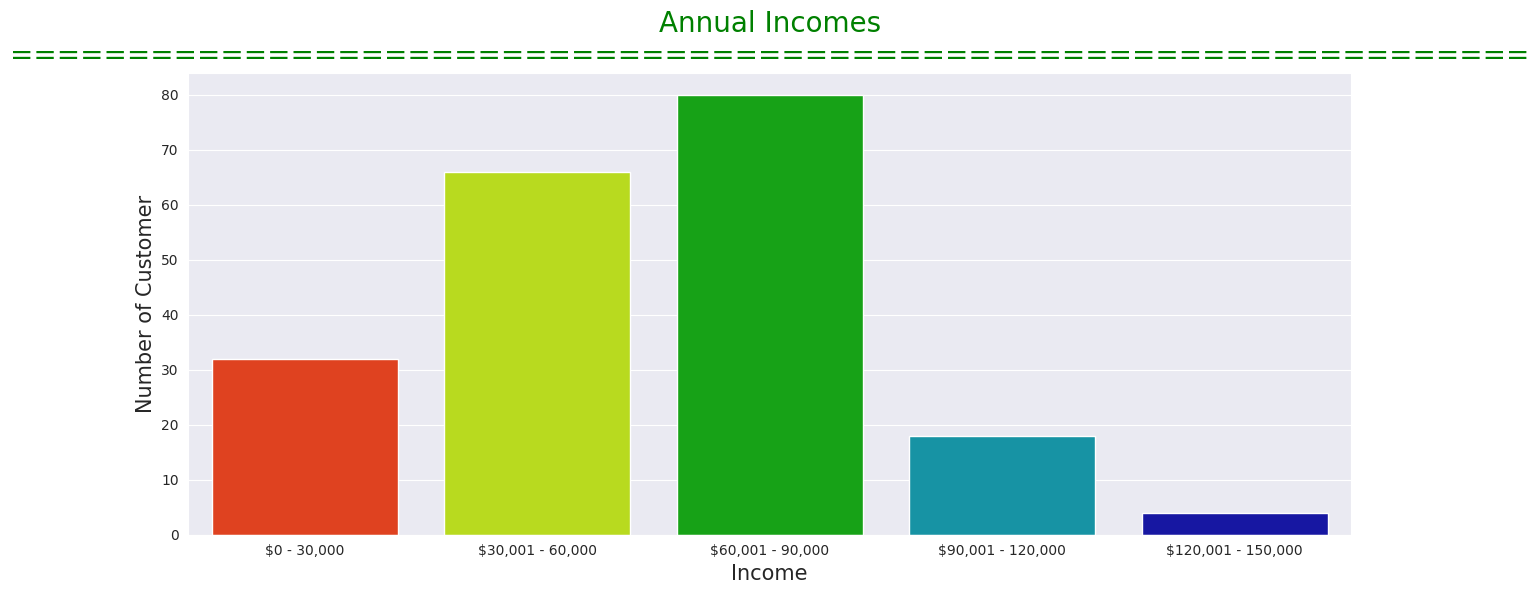

In [ ]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

income_x = ["$0 - 30,000", "$30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes\n=================================================================", fontsize=20, color="green")
plt.xlabel("Income", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15)
plt.show()

In [ ]:
df_scaled = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)

In [ ]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [ ]:
var_list = df_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(var_list)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(var_list)

    ssd.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The elbow curve

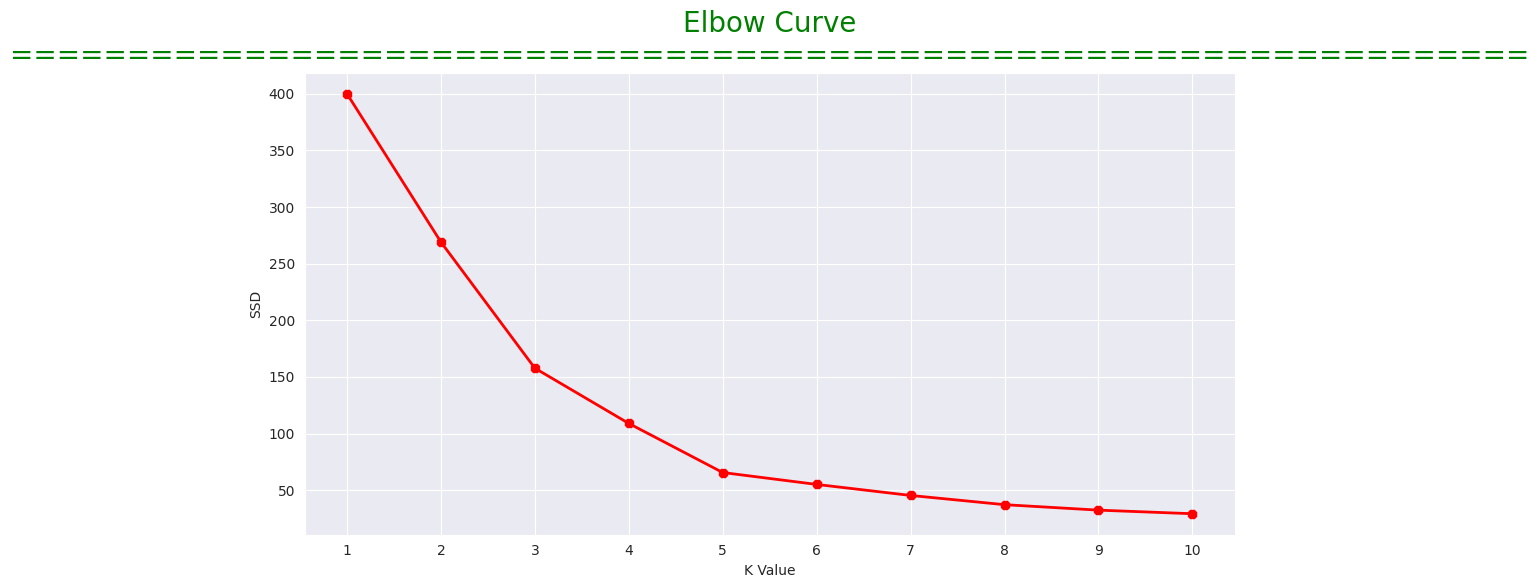

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(var_list)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

In [ ]:
kmeans.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
df["Label"] = kmeans.labels_

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


ScatterPlot when K=5

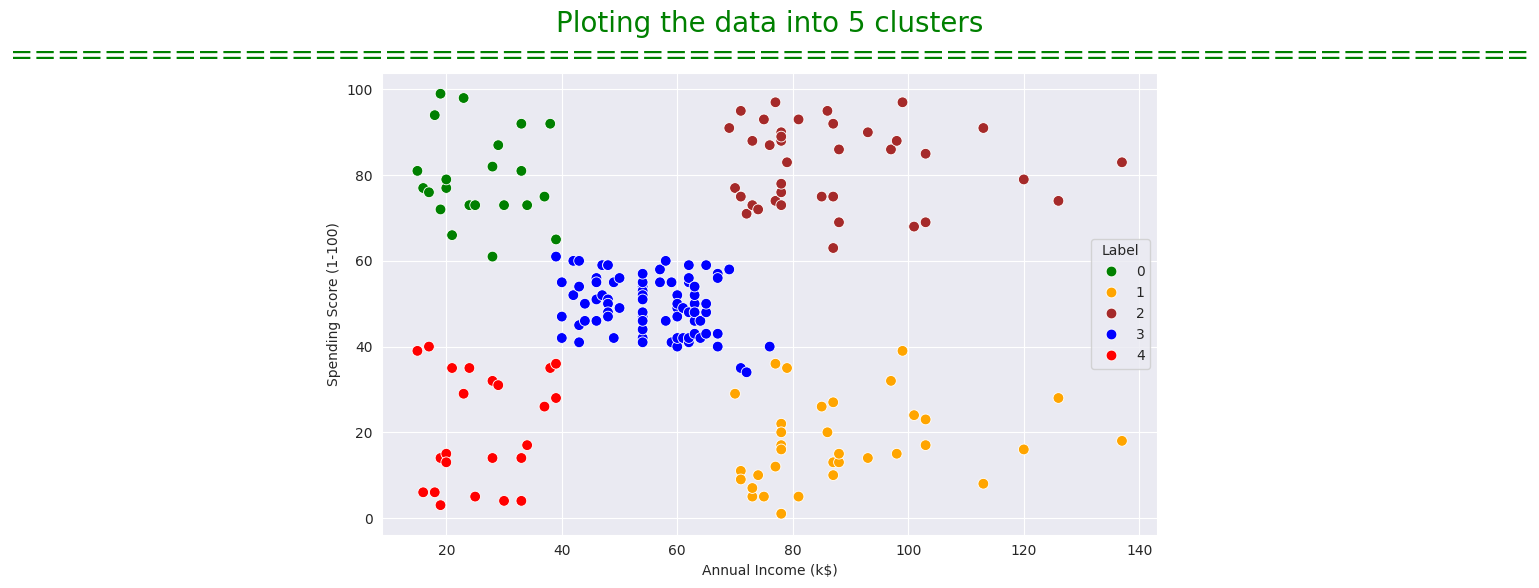

In [ ]:
plt.figure(figsize=(10,6))

plt.title("Ploting the data into 5 clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()